# Decision Trees in Python

### Formatting our Dataset

The first task, of course, is to load up our data.

In [8]:
import pandas as pd
df= pd.read_csv('./customer_data.csv', index_col=0)
df

,attended_college,under_thirty,borough,income,customer
0,?,Yes,Manhattan,< 55,0
1,Yes,Yes,Brooklyn,< 55,0
2,?,No,Brooklyn,< 55,1
3,No,No,Queens,> 100,1
4,?,No,Queens,55 - 100,1
5,Yes,No,Manhattan,> 100,0
6,Yes,No,Queens,> 100,0
7,Yes,Yes,Brooklyn,55 - 100,0


In [7]:
df.dtypes

attended_college    object
under_thirty        object
borough             object
income              object
customer             int64
dtype: object

In [10]:
df_categories = df.select_dtypes('object').astype('category')

In [15]:
df_categories.attended_college.cat.categories

Index(['?', 'No', 'Yes'], dtype='object')

In [16]:
df_categories.attended_college.cat.codes

0    0
1    2
2    0
3    1
4    0
5    2
6    2
7    2
dtype: int8

In [30]:
df_categories.attended_college.cat.categories

Index(['?', 'No', 'Yes'], dtype='object')

In [33]:
df_categories.attended_college.cat.set_categories(['?', 'Yes', 'No']).cat.codes

0    0
1    1
2    0
3    2
4    0
5    1
6    1
7    1
dtype: int8

In [18]:
X = df_categories.apply(lambda x: x.cat.codes)

In [19]:
y = df.customer

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
model = DecisionTreeClassifier()

In [23]:
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Working with categorical data

* Turn data into categorical 

In [67]:
# X
# y

In [68]:
# inspect categories

And if we like, we view a corresponding code for each entry in our categorical feature.

In [69]:
# and codes

In [56]:
# convert into codes

### Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dtc = DecisionTreeClassifier()
dtc.fit(X_coded, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
from sklearn import tree
from IPython.display import SVG, display
from graphviz import Source 


graph_1 = Source(tree.export_graphviz(model, out_file=None,
                                feature_names=X.columns))

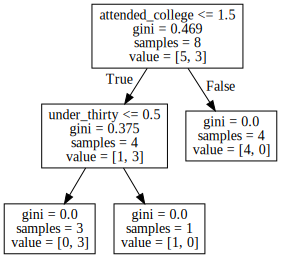

In [26]:
graph_1

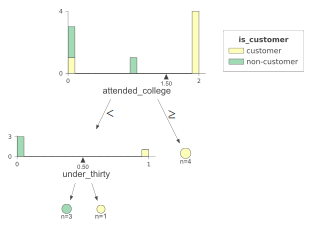

In [34]:
from dtreeviz.trees import dtreeviz
viz = dtreeviz(dtc,
               X_coded.to_numpy(),
               y,
               target_name='is_customer',
               feature_names=X.columns,
               class_names=["customer", "non-customer"]
              )
              
viz   

In [63]:
dtc_1 = DecisionTreeClassifier()
dtc_1.fit(X_dummied, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

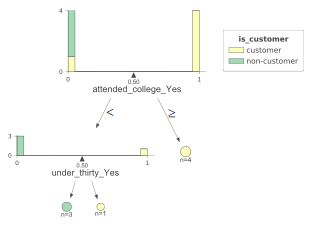

In [66]:
from dtreeviz.trees import dtreeviz
viz_1 = dtreeviz(dtc_1,
               X_dummied.to_numpy(),
               y,
               target_name='is_customer',
               feature_names=X_dummied.columns,
               class_names=["customer", "non-customer"]
              )
              
viz_1   

We can also view how the decision tree works just working with the sklearn library.

In [108]:
x_1 = [1, 1, 0,0]
x_2 = [1, 0, 0,0]

dtc.predict([x_1, x_2])

array([0, 1])